In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
df= pd.read_excel('data.xlsx')


In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

Outliers in Salary:
       Salary        DOJ                  DOL                 Designation  \
3     1100000 2011-07-01              present    senior software engineer   
76     800000 2012-06-01              present           software engineer   
92    1500000 2014-11-01  2014-07-01 00:00:00       application developer   
123   1200000 2010-07-01  2011-07-01 00:00:00            engineer trainee   
128    675000 2011-11-01              present    senior software engineer   
...       ...        ...                  ...                         ...   
3823   775000 2014-08-01              present  mechanical design engineer   
3904   850000 2011-09-01              present        operations assistant   
3912   730000 2013-07-01              present          research scientist   
3961   700000 2011-07-01  2014-09-01 00:00:00           planning engineer   
3992   800000 2014-04-01  2015-04-01 00:00:00                     manager   

          JobCity Gender        DOB  10percentage      

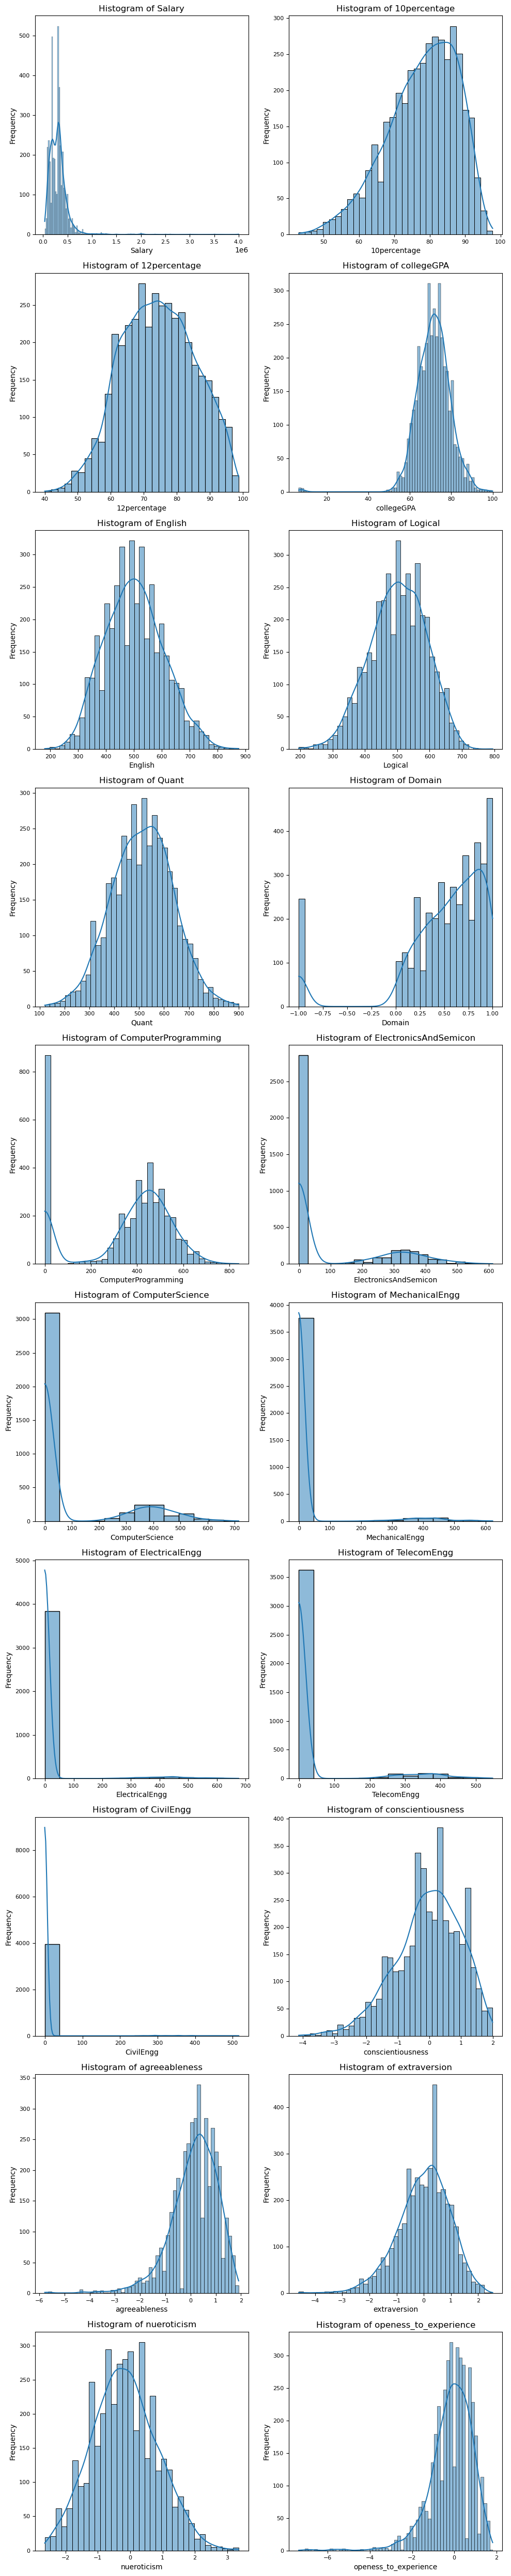

In [7]:
df=df.drop('Unnamed: 0' ,axis=1)
df = df.drop('CollegeCityID', axis=1)
df=df.drop('ID', axis=1)
df=df.drop('CollegeID', axis=1)
df=df.drop('12graduation', axis=1)
df=df.drop('GraduationYear', axis=1)
df=df.drop('CollegeTier', axis=1)
df=df.drop('CollegeCityTier', axis=1)
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows required for the subplots
num_rows = (len(numerical_columns) + 1) // 2  # Add 1 and integer divide to ensure enough rows for odd numbers of plots

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical column and corresponding subplot
for i, col in enumerate(numerical_columns):
    row = i // 2  # Calculate the row index
    col_index = i % 2  # Calculate the column index
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Histogram of {col}')
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Frequency')
    axes[row, col_index].tick_params(axis='both', which='major', labelsize=8)

    # Calculate the interquartile range (IQR) for outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Find outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Print the outliers
    print(f'Outliers in {col}:')
    print(outliers)
    print('\n')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Visualization: The below mentioned are the important points through the visualization:

# Salary Distribution: In most of the candidates, almost everyone earned an average annual package of around 300,000 Indian Rupees.

# Academic Performance: On an average, 12th percentile score was around 76, while 10th percentile score was around 87.

# AMCAT Scores: The scores of the candidates are reasonably good in English (480), Logical (500), Quantitative (550), and Computer Programming (450).

# Personality Test Scores: The scores in one of the sections of the personality test of AMCAT are scattered across the candidates.

# Engineering Specializations: Some engineering disciplines display a skewed distribution of scores that does not look normal, and could thus potentially signal differences in performance or interest in those fields.

# This abstract emphasizes relevant results from earnings, GPA, test scores, and engineering specializations.

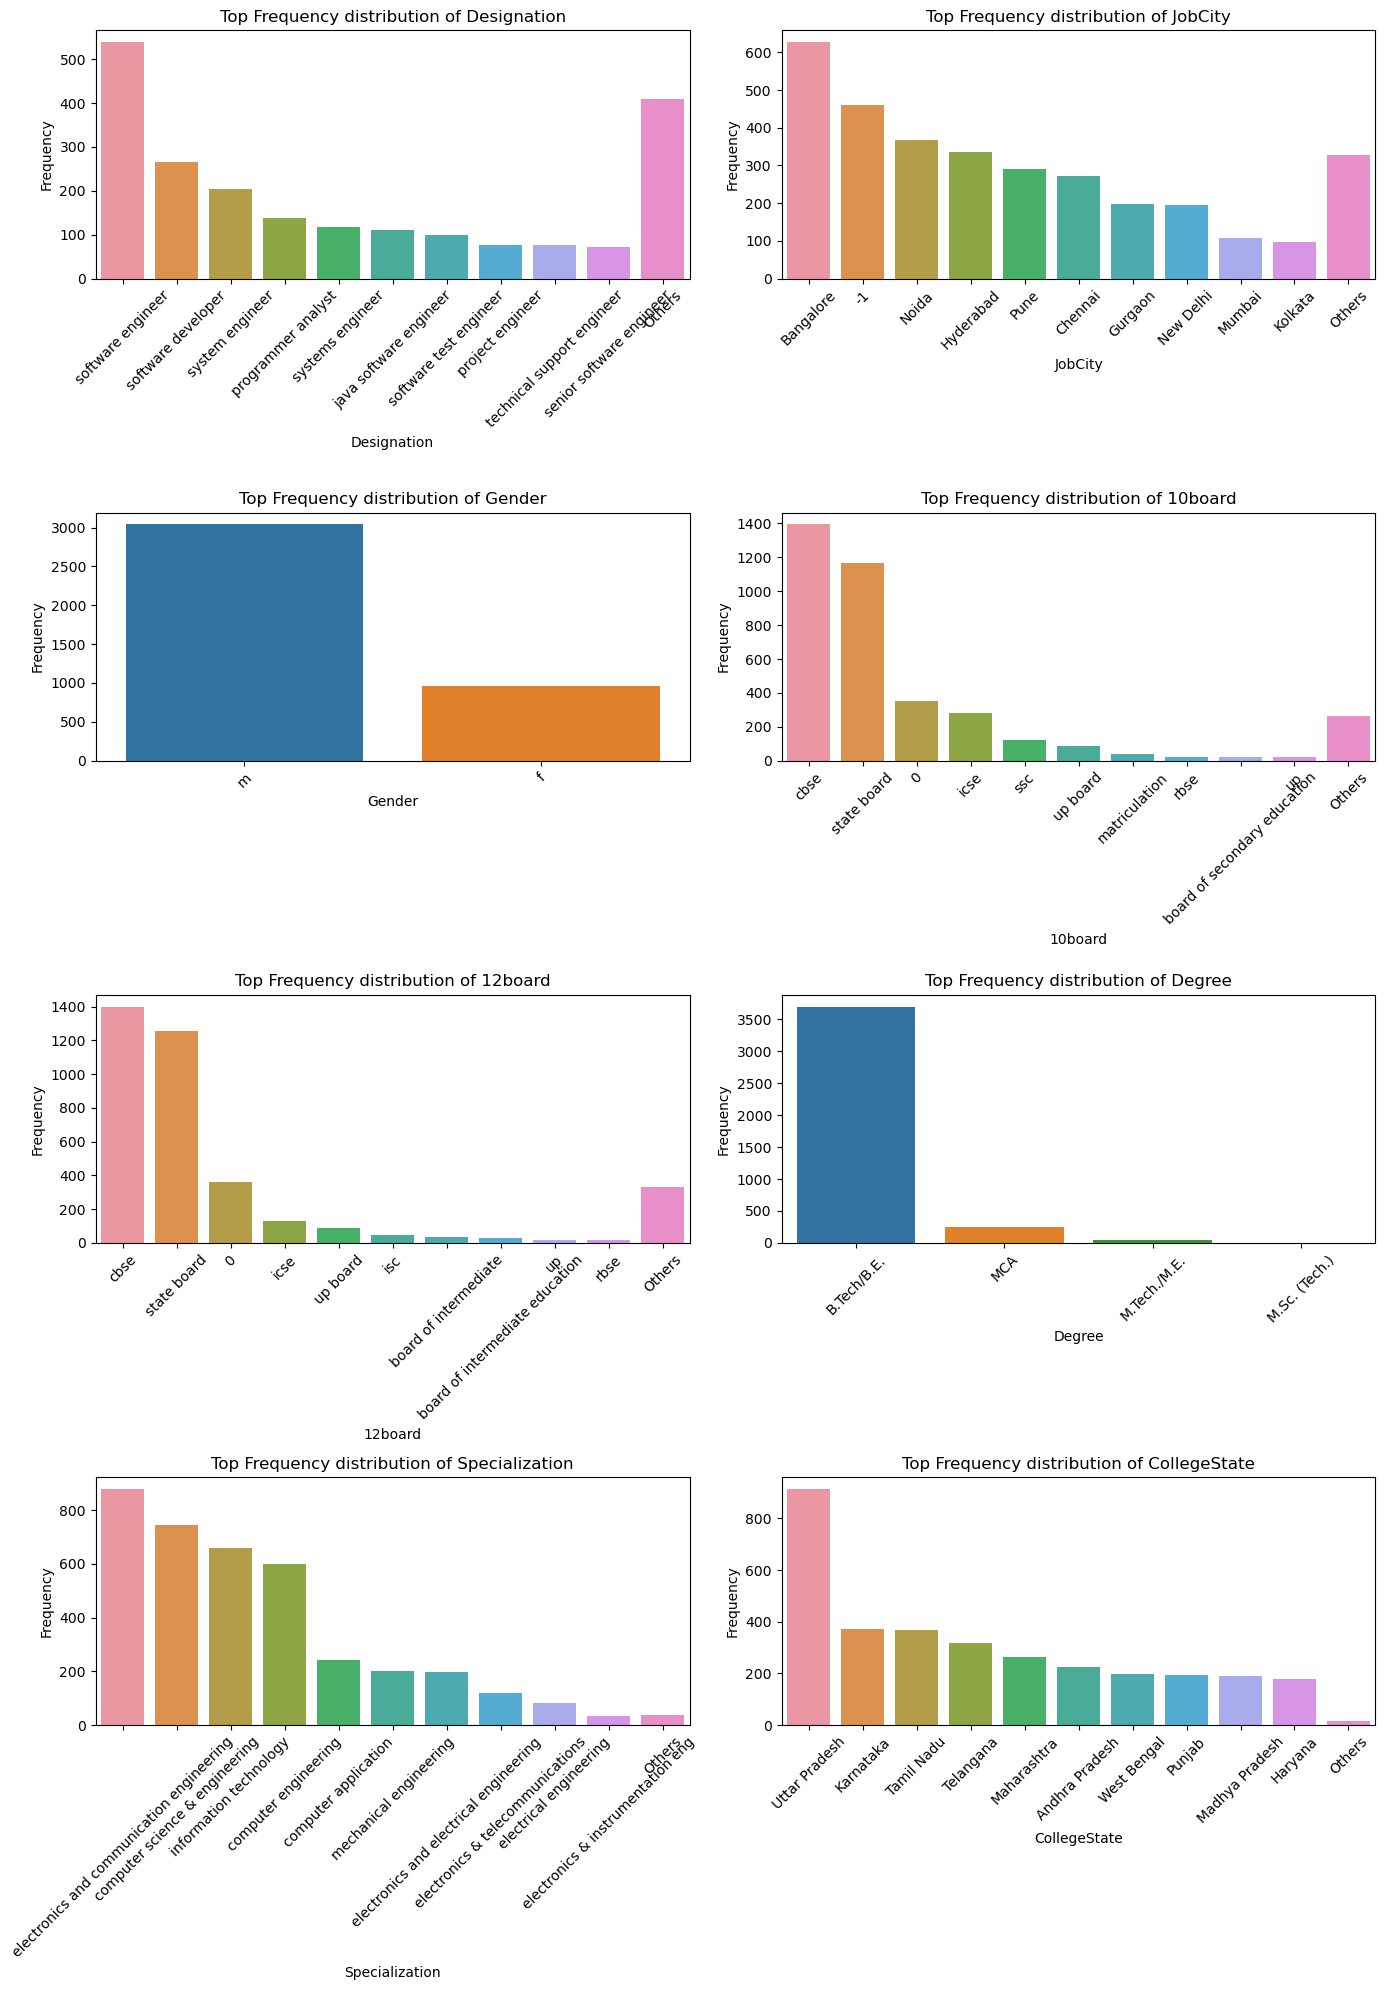

In [17]:


# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of rows required for the subplots
num_rows = (len(categorical_columns) + 1) // 2  # Add 1 and integer divide to ensure enough rows for odd numbers of plots

# Set up the figure and axes for subplots with larger figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 5 * num_rows))
fig.subplots_adjust(hspace=0.8)  # Increase vertical spacing between subplots

# Loop through each categorical column and corresponding subplot
for i, col in enumerate(categorical_columns):
    row = i // 2  # Calculate the row index
    col_index = i % 2  # Calculate the column index
    
    # Count the frequency of each category
    counts = df[col].value_counts()
    
    # Collapse less frequent categories into "Others" if there are more than 10 categories
    if len(counts) > 10:
        counts = counts.head(10)  # Limit to top 10 most frequent categories
        counts['Others'] = df[col].nunique() - 10  # Calculate count of "Others" category
    
    # Create barplot with custom x-axis and y-axis
    sns.barplot(x=counts.index, y=counts.values, ax=axes[row, col_index])
    
    # Rotate x-axis labels for better readability
    axes[row, col_index].tick_params(axis='x', rotation=45)
    
    # Set labels and title
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel('Frequency')
    axes[row, col_index].set_title(f'Top Frequency distribution of {col}')

# If the number of plots is odd, remove the empty subplot
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# The above statistics point to some key trends:

# Most have been trained, hence very active in skills development.
# There is a clear disparity from software engineers to senior software engineers, and this suggests there are not many openings for upward mobility in one's career.
# Bangalore seems to be one of the good employment centers coming up, for the good job opportunities in the neighborhood.
# There exists a gender gap—less participation of females than that of males.
# CBSE as a board enjoys good success and participation rates for both the categories—10th and 12th examination—pointing towards its popularity among the candidates.
# Preference is in B.Tech/B.E degrees, mostly in Electronics and Communication Engineering.
# Uttar Pradesh is a huge college education destination.

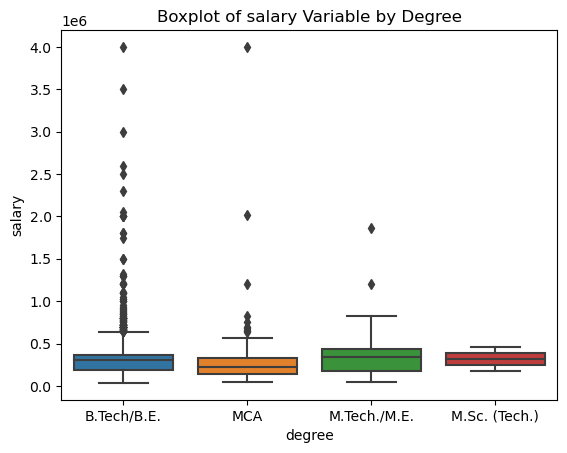

In [9]:
x = df['Degree']
y = df['Salary']

# Create a boxplot
sns.boxplot(x=x, y=y)
plt.xlabel('degree')
plt.ylabel('salary')
plt.title('Boxplot of salary Variable by Degree')
plt.show()

In [ ]:
# From the boxplot chart, it can be observed that the median salary is the highest for M.Tech/M.E,
# followed by B.Tech/B.E, M.Sc. (Tech.) and MCA, in the same order. The IQR is the most narrow for M.Sc. (Tech.) and M.Tech/M.E;
# this means that the range of salaries for these degrees is less varied. Maximum IQR is seen in the case of B.Tech/B.E.,
# so it can be said there is more variation in salaries of this degree. But in the case of B.Tech/B.E. and MCA, there are more outliers compared to M.Tech/M.E.
# and M.Sc.(Tech.).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


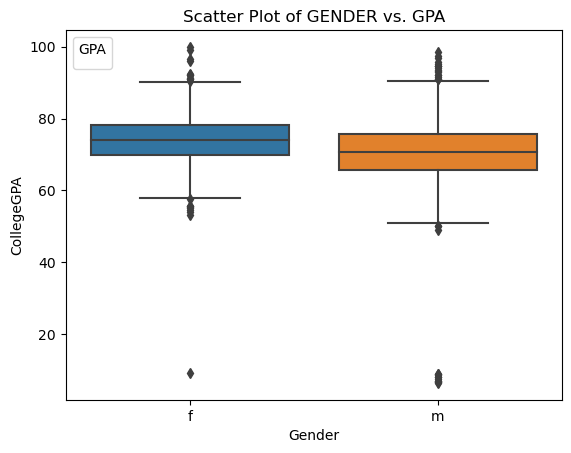

In [10]:
x=df['Gender']
y=df['collegeGPA']
sns.boxplot(x='Gender', y='collegeGPA', data=df)
plt.xlabel('Gender')
plt.ylabel('CollegeGPA')
plt.title('Scatter Plot of GENDER vs. GPA')
plt.legend(title='GPA', loc='upper left')
plt.show()

In [ ]:

#  it is evident that there is a noticeable difference in the distribution of GPAs between males and females.
#  Specifically, the median GPA of females appears to be significantly higher than that of males.
#  This observation suggests that, on average, females tend to have higher academic performance or achievement levels compared to males within the dataset.

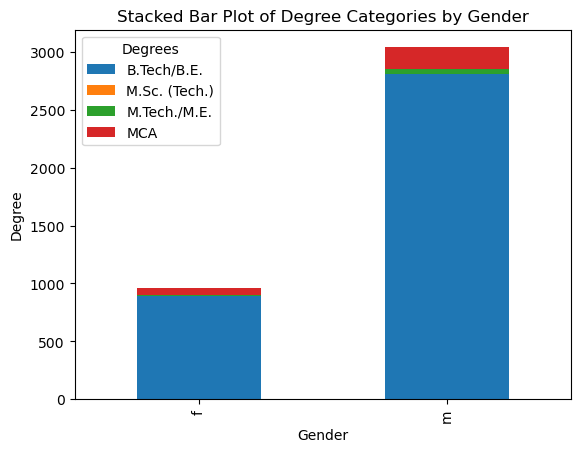

In [11]:
cross_tab = pd.crosstab(df['Gender'], df['Degree'])

# Plot the stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Degree')
plt.title('Stacked Bar Plot of Degree Categories by Gender')
plt.legend(title='Degrees')
plt.show()

In [ ]:
# The stacked bar plot brings out insights into the distribution of the level of education across gender categories
# in a dataset of close to 4000 candidates. It particularly represents B.Tech/B.E., M.Sc, M.Tech, and MCA fields of study. Most of the candidates, 
# in both genders, are reading B.Tech/B.E. However, exploring the ratio among males and females, males are representing more than two to one in 
# all the fields of the degree being pursued by the candidates. It has been assumed that 3000 male candidates are being conferred with degrees in 
# all the fields than 1000 female candidates.

# The above observation only drives the point home that males were the leading candidates compared to females
# in the educational pursuit being considered by the dataset across all degree fields.


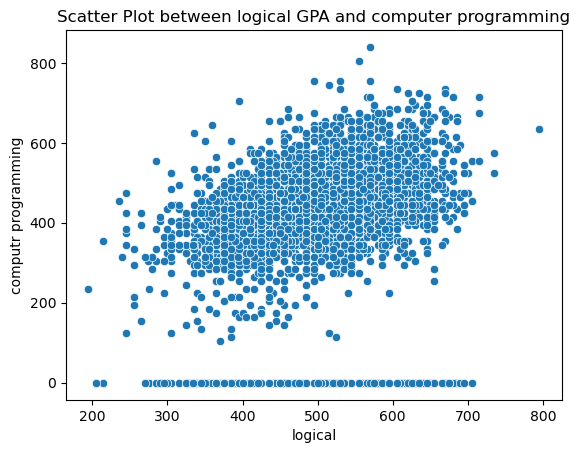

In [12]:
sns.scatterplot(x='Logical', y='ComputerProgramming', data=df)
plt.title('Scatter Plot between logical GPA and computer programming')
plt.xlabel('logical')
plt.ylabel('computr programming')
plt.show()

In [ ]:
# The scatter plot shows a positive correlation between Logical and ComputerProgramming,
# meaning as one’s GPA increases, their salary tends to increase as well.

In [13]:
#  Research questions
# Filter the DataFrame for fresh graduates with Computer Science Engineering specialization
cs_graduates = df[(df['Specialization'] == 'computer engineering') ]

# Filter the DataFrame for job roles specified in the claim
specified_job_roles = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = cs_graduates[cs_graduates['Designation'].isin(specified_job_roles)]

# Calculate the salary statistics
average_salary = filtered_data['Salary'].mean()
maximum_salary = filtered_data['Salary'].max()
minimum_salary= filtered_data['Salary'].min()
# Print the results
print("Average salary for fresh Computer Science Engineering graduates in specified job roles:", average_salary)
print("Maximum salary for fresh Computer Science Engineering graduates in specified job roles:", maximum_salary)
print("Minumum salary for fresh Computer Science Engineering graduates in specified job roles:", minimum_salary)



Average salary for fresh Computer Science Engineering graduates in specified job roles: 384222.22222222225
Maximum salary for fresh Computer Science Engineering graduates in specified job roles: 1500000
Minumum salary for fresh Computer Science Engineering graduates in specified job roles: 110000


In [ ]:
# As per the inspection of my data, the expectations of salary through the Times of India provided are justified,
# since average salaries for fresh graduates to hold the specified job roles are very near to the lower bound of salaries.
# It is pretty clear though that there's a variation of a lot in the pay that some graduates are getting;
# some do receive way above the range the article had quoted and some way lower.

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

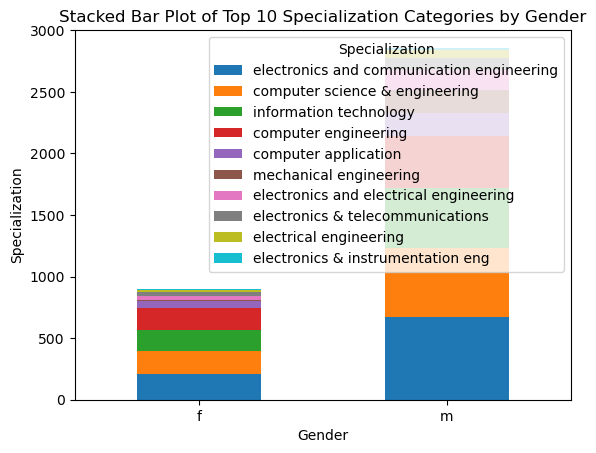

In [15]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['Gender'], df['Specialization'])
specialization_categories = cross_tab.columns.tolist()

# Select the top 10 most frequent specialization categories
top_10_specializations = df['Specialization'].value_counts().head(10).index

# Filter the list of specialization categories to include only the top 10
top_10_specializations = [category for category in top_10_specializations if category in specialization_categories]

# Filter the cross-tabulation DataFrame to include only the top 10 specializations
cross_tab_filtered = cross_tab[top_10_specializations]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot the stacked bar plot
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Specialization')
plt.title('Stacked Bar Plot of Top 10 Specialization Categories by Gender')
plt.legend(title='Specialization')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# All specializations mentioned above are more in demand with males than with females.
# Electronics & Communication Engineering is the specialization preferred the most among males as well as females,
# followed by Computer Science & Engineering and Information Technology.
# Mechanical engineering has the largest gender gap, with males outnumbering females by more than 10 times.

In [ ]:
# Salary Distribution: The majority of candidates earned an average annual package of around 300,000 Indian Rupees, indicating a common salary benchmark among fresh graduates.

# Academic Performance: On average, candidates scored around 76 percentile in 12th grade and 87 percentile in 10th grade, suggesting a relatively strong academic background among the cohort.

# AMCAT Scores: Candidates generally achieved reasonably good scores in English, Logical, Quantitative, and Computer Programming sections of the AMCAT test, indicating proficiency in these areas.

# Personality Test Scores: There is a varied distribution of scores in one of the sections of the personality test, suggesting diversity in personality traits among the candidates.

# Engineering Specializations: Certain engineering disciplines exhibit skewed distributions, potentially indicating differences in performance or interest in those fields. Electronics and Communication Engineering emerges as a preferred specialization among candidates.

# Key Trends:

# Active Skills Development: Most candidates have been actively engaged in skills development.
# Career Mobility: There appears to be a disparity in career advancement opportunities, particularly evident from the transition from software engineers to senior software engineers.
# Employment Centers: Bangalore emerges as a significant employment center, offering promising job opportunities.
# Gender Gap: There is a noticeable gender gap, with fewer female participants compared to males.
# Educational Preferences: B.Tech/B.E degrees, particularly in Electronics and Communication Engineering, are popular choices among candidates.
# Geographic Trends: Uttar Pradesh stands out as a major destination for college education.
# Salary and Education Level: The boxplot analysis reveals differences in median salaries across different degrees, with M.Tech/M.E graduates commanding the highest median salary. However, there is a wider range of salaries for B.Tech/B.E graduates, indicating greater variability.

# Gender Disparity in GPAs: Females tend to have higher median GPAs compared to males, suggesting better academic performance among female candidates.

# Educational Pursuit: Males outnumber females across all degree fields, with a significant gender gap observed in Mechanical Engineering.

# Correlation Analysis: There is a positive correlation between Logical and Computer Programming scores, indicating that as one's GPA increases, their salary tends to increase as well.

# Validation of Salary Expectations: The average salaries for fresh graduates in specified job roles align closely with the lower bound of salaries mentioned in the Times of India article, indicating justification for the salary expectations provided.

# Specialization Preferences by Gender: All specializations mentioned are more popular among males than females, with Electronics & Communication Engineering being the most preferred specialization among both genders. However, there is a substantial gender gap in Mechanical Engineering, with male candidates outnumbering females significantly.

# In summary, the data analysis provides valuable insights into the academic performance, skills, specialization preferences, and salary distribution among fresh graduates in the field of Computer Science Engineering. These insights can inform decision-making processes in recruitment, career planning, and educational policies, while also highlighting areas for further exploration and intervention to address gender disparities and promote inclusivity in the field.